# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


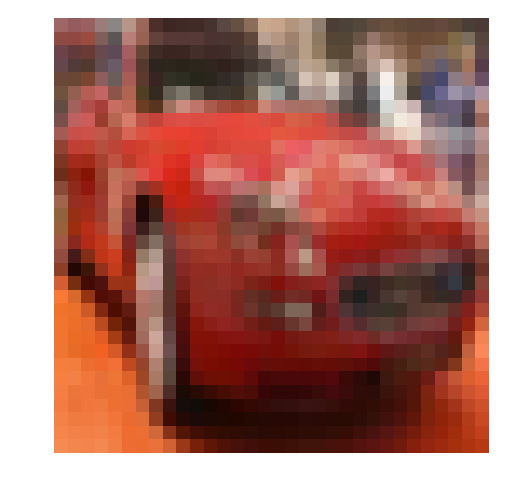

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
#import sklearn
#from sklearn.preprocessing import normalize
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    #return np.array(x/255.0)
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
import sklearn
from sklearn import preprocessing
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    #print(x)
    labels = np.array(x)
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(labels)
    lb.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    return lb.transform(labels)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None]+list(image_shape), name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None]+[n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    input_depth = int(x_tensor.get_shape()[3])
    
    weights = tf.Variable(tf.truncated_normal([*conv_ksize, input_depth, conv_num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs]))
    
    conv_layer = tf.nn.conv2d(x_tensor, weights, [1, *conv_strides, 1], padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.max_pool(conv_layer, [1, *pool_ksize, 1], [1, *pool_ksize, 1], padding='SAME') 

    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    x_shape = x_tensor.get_shape().as_list()
    
    flatten_size = x_shape[1] * x_shape[2] * x_shape[3]
    
    return tf.reshape(x_tensor, [-1, flatten_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    dim = int(x_tensor.shape[1])
    
    weights = tf.Variable(tf.truncated_normal([dim, num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs]))
    
    fully_layer = tf.add(tf.matmul(x_tensor, weights), bias)
    fully_layer = tf.nn.relu(fully_layer)
    
    return fully_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    dim = int(x_tensor.shape[1])
    
    weights = tf.Variable(tf.truncated_normal([dim, num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs]))
    
    output_layer = tf.add(tf.matmul(x_tensor, weights), bias)
    
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Layer1
    x_tensor = x
    conv_num_outputs = 64
    conv_ksize = (8,8)
    conv_strides = (2,2)
    pool_ksize = (4,4)
    pool_strides = (1,1)
    keep_prob = 0.5
    num_outputs = 10
    conv_layer = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Layer2
    conv_num_outputs = 128
    conv_ksize = (4, 4)
    pool_ksize = (3, 3)
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
     
    # Layer3    
    conv_num_outputs = 256
    conv_ksize = (2, 2)
    pool_ksize = (2, 2) 
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flatten_layer = flatten(conv_layer)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Layer1
    fully_layer = fully_conn(flatten_layer, 1500)
    fully_layer = tf.nn.dropout(fully_layer, keep_prob)
    
    # Layer2
    fully_layer = fully_conn(fully_layer, 1000)
    fully_layer = tf.nn.dropout(fully_layer, keep_prob)
    
    # Layer3
    fully_layer = fully_conn(fully_layer, 500)
    fully_layer = tf.nn.dropout(fully_layer, keep_prob)
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    output_layer = output(fully_layer, num_outputs)
    
    # TODO: return output
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    the_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})

    print('Loss: ', loss, ' Accuracy: ', the_accuracy)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 500
batch_size = 2000
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:  18.8016  Accuracy:  0.107
Epoch  2, CIFAR-10 Batch 1:  Loss:  8.58027  Accuracy:  0.1194
Epoch  3, CIFAR-10 Batch 1:  Loss:  5.45483  Accuracy:  0.1312
Epoch  4, CIFAR-10 Batch 1:  Loss:  4.17377  Accuracy:  0.146
Epoch  5, CIFAR-10 Batch 1:  Loss:  3.40092  Accuracy:  0.146
Epoch  6, CIFAR-10 Batch 1:  Loss:  3.0129  Accuracy:  0.1522
Epoch  7, CIFAR-10 Batch 1:  Loss:  2.70446  Accuracy:  0.159
Epoch  8, CIFAR-10 Batch 1:  Loss:  2.6447  Accuracy:  0.1714
Epoch  9, CIFAR-10 Batch 1:  Loss:  2.52656  Accuracy:  0.1776
Epoch 10, CIFAR-10 Batch 1:  Loss:  2.39138  Accuracy:  0.1826
Epoch 11, CIFAR-10 Batch 1:  Loss:  2.36847  Accuracy:  0.188
Epoch 12, CIFAR-10 Batch 1:  Loss:  2.30555  Accuracy:  0.1992
Epoch 13, CIFAR-10 Batch 1:  Loss:  2.29237  Accuracy:  0.2092
Epoch 14, CIFAR-10 Batch 1:  Loss:  2.25465  Accuracy:  0.204
Epoch 15, CIFAR-10 Batch 1:  Loss:  2.18714  Accuracy:  0.2154
Epoch 16, CIFAR-10 B

Epoch 130, CIFAR-10 Batch 1:  Loss:  0.877449  Accuracy:  0.4976
Epoch 131, CIFAR-10 Batch 1:  Loss:  0.87412  Accuracy:  0.4882
Epoch 132, CIFAR-10 Batch 1:  Loss:  0.926033  Accuracy:  0.4764
Epoch 133, CIFAR-10 Batch 1:  Loss:  0.877363  Accuracy:  0.483
Epoch 134, CIFAR-10 Batch 1:  Loss:  0.861563  Accuracy:  0.4958
Epoch 135, CIFAR-10 Batch 1:  Loss:  0.896488  Accuracy:  0.4808
Epoch 136, CIFAR-10 Batch 1:  Loss:  0.980363  Accuracy:  0.4566
Epoch 137, CIFAR-10 Batch 1:  Loss:  1.00203  Accuracy:  0.4566
Epoch 138, CIFAR-10 Batch 1:  Loss:  0.961751  Accuracy:  0.4702
Epoch 139, CIFAR-10 Batch 1:  Loss:  0.905078  Accuracy:  0.4792
Epoch 140, CIFAR-10 Batch 1:  Loss:  0.889246  Accuracy:  0.494
Epoch 141, CIFAR-10 Batch 1:  Loss:  0.819541  Accuracy:  0.4884
Epoch 142, CIFAR-10 Batch 1:  Loss:  0.817081  Accuracy:  0.4934
Epoch 143, CIFAR-10 Batch 1:  Loss:  0.786707  Accuracy:  0.4852
Epoch 144, CIFAR-10 Batch 1:  Loss:  0.810019  Accuracy:  0.4956
Epoch 145, CIFAR-10 Batch 1: 

Epoch 257, CIFAR-10 Batch 1:  Loss:  0.384824  Accuracy:  0.4772
Epoch 258, CIFAR-10 Batch 1:  Loss:  0.294823  Accuracy:  0.505
Epoch 259, CIFAR-10 Batch 1:  Loss:  0.355202  Accuracy:  0.4966
Epoch 260, CIFAR-10 Batch 1:  Loss:  0.336519  Accuracy:  0.4992
Epoch 261, CIFAR-10 Batch 1:  Loss:  0.392133  Accuracy:  0.501
Epoch 262, CIFAR-10 Batch 1:  Loss:  0.317637  Accuracy:  0.5156
Epoch 263, CIFAR-10 Batch 1:  Loss:  0.263845  Accuracy:  0.5186
Epoch 264, CIFAR-10 Batch 1:  Loss:  0.234372  Accuracy:  0.5134
Epoch 265, CIFAR-10 Batch 1:  Loss:  0.235697  Accuracy:  0.531
Epoch 266, CIFAR-10 Batch 1:  Loss:  0.289338  Accuracy:  0.5122
Epoch 267, CIFAR-10 Batch 1:  Loss:  0.328292  Accuracy:  0.5076
Epoch 268, CIFAR-10 Batch 1:  Loss:  0.269861  Accuracy:  0.5172
Epoch 269, CIFAR-10 Batch 1:  Loss:  0.199315  Accuracy:  0.525
Epoch 270, CIFAR-10 Batch 1:  Loss:  0.206254  Accuracy:  0.5174
Epoch 271, CIFAR-10 Batch 1:  Loss:  0.204074  Accuracy:  0.516
Epoch 272, CIFAR-10 Batch 1:  

Epoch 383, CIFAR-10 Batch 1:  Loss:  0.063205  Accuracy:  0.519
Epoch 384, CIFAR-10 Batch 1:  Loss:  0.0600538  Accuracy:  0.526
Epoch 385, CIFAR-10 Batch 1:  Loss:  0.0759049  Accuracy:  0.5272
Epoch 386, CIFAR-10 Batch 1:  Loss:  0.062158  Accuracy:  0.5136
Epoch 387, CIFAR-10 Batch 1:  Loss:  0.0483051  Accuracy:  0.527
Epoch 388, CIFAR-10 Batch 1:  Loss:  0.0368185  Accuracy:  0.5288
Epoch 389, CIFAR-10 Batch 1:  Loss:  0.0386866  Accuracy:  0.5372
Epoch 390, CIFAR-10 Batch 1:  Loss:  0.0427096  Accuracy:  0.5324
Epoch 391, CIFAR-10 Batch 1:  Loss:  0.0256623  Accuracy:  0.5294
Epoch 392, CIFAR-10 Batch 1:  Loss:  0.0404098  Accuracy:  0.5288
Epoch 393, CIFAR-10 Batch 1:  Loss:  0.0226435  Accuracy:  0.5364
Epoch 394, CIFAR-10 Batch 1:  Loss:  0.0238813  Accuracy:  0.5316
Epoch 395, CIFAR-10 Batch 1:  Loss:  0.0255823  Accuracy:  0.5218
Epoch 396, CIFAR-10 Batch 1:  Loss:  0.0394641  Accuracy:  0.5202
Epoch 397, CIFAR-10 Batch 1:  Loss:  0.0304394  Accuracy:  0.5322
Epoch 398, CIFA


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:  22.7363  Accuracy:  0.1114
Epoch  1, CIFAR-10 Batch 2:  Loss:  10.5342  Accuracy:  0.1212
Epoch  1, CIFAR-10 Batch 3:  Loss:  6.67319  Accuracy:  0.1322
Epoch  1, CIFAR-10 Batch 4:  Loss:  4.63228  Accuracy:  0.144
Epoch  1, CIFAR-10 Batch 5:  Loss:  3.95487  Accuracy:  0.1414
Epoch  2, CIFAR-10 Batch 1:  Loss:  3.31419  Accuracy:  0.1318
Epoch  2, CIFAR-10 Batch 2:  Loss:  3.06681  Accuracy:  0.1454
Epoch  2, CIFAR-10 Batch 3:  Loss:  2.85832  Accuracy:  0.1504
Epoch  2, CIFAR-10 Batch 4:  Loss:  2.66722  Accuracy:  0.1634
Epoch  2, CIFAR-10 Batch 5:  Loss:  2.51381  Accuracy:  0.164
Epoch  3, CIFAR-10 Batch 1:  Loss:  2.54082  Accuracy:  0.17
Epoch  3, CIFAR-10 Batch 2:  Loss:  2.44865  Accuracy:  0.1648
Epoch  3, CIFAR-10 Batch 3:  Loss:  2.42638  Accuracy:  0.1918
Epoch  3, CIFAR-10 Batch 4:  Loss:  2.31779  Accuracy:  0.1986
Epoch  3, CIFAR-10 Batch 5:  Loss:  2.27021  Accuracy:  0.1974
Epoch  4, CIFAR-10 Batch 1:  Loss:  2.26174  Ac

Epoch 27, CIFAR-10 Batch 1:  Loss:  1.38855  Accuracy:  0.483
Epoch 27, CIFAR-10 Batch 2:  Loss:  1.38254  Accuracy:  0.481
Epoch 27, CIFAR-10 Batch 3:  Loss:  1.34934  Accuracy:  0.48
Epoch 27, CIFAR-10 Batch 4:  Loss:  1.3688  Accuracy:  0.4834
Epoch 27, CIFAR-10 Batch 5:  Loss:  1.33519  Accuracy:  0.4888
Epoch 28, CIFAR-10 Batch 1:  Loss:  1.34318  Accuracy:  0.4846
Epoch 28, CIFAR-10 Batch 2:  Loss:  1.3899  Accuracy:  0.468
Epoch 28, CIFAR-10 Batch 3:  Loss:  1.36774  Accuracy:  0.4804
Epoch 28, CIFAR-10 Batch 4:  Loss:  1.37275  Accuracy:  0.4768
Epoch 28, CIFAR-10 Batch 5:  Loss:  1.38156  Accuracy:  0.4732
Epoch 29, CIFAR-10 Batch 1:  Loss:  1.34473  Accuracy:  0.4914
Epoch 29, CIFAR-10 Batch 2:  Loss:  1.30671  Accuracy:  0.493
Epoch 29, CIFAR-10 Batch 3:  Loss:  1.3067  Accuracy:  0.4994
Epoch 29, CIFAR-10 Batch 4:  Loss:  1.34474  Accuracy:  0.4922
Epoch 29, CIFAR-10 Batch 5:  Loss:  1.36364  Accuracy:  0.4922
Epoch 30, CIFAR-10 Batch 1:  Loss:  1.33787  Accuracy:  0.4864
E

Epoch 53, CIFAR-10 Batch 2:  Loss:  1.00852  Accuracy:  0.5572
Epoch 53, CIFAR-10 Batch 3:  Loss:  1.00999  Accuracy:  0.5534
Epoch 53, CIFAR-10 Batch 4:  Loss:  1.07632  Accuracy:  0.5504
Epoch 53, CIFAR-10 Batch 5:  Loss:  1.044  Accuracy:  0.5458
Epoch 54, CIFAR-10 Batch 1:  Loss:  1.05747  Accuracy:  0.561
Epoch 54, CIFAR-10 Batch 2:  Loss:  1.03866  Accuracy:  0.5696
Epoch 54, CIFAR-10 Batch 3:  Loss:  0.969672  Accuracy:  0.5516
Epoch 54, CIFAR-10 Batch 4:  Loss:  0.963441  Accuracy:  0.5662
Epoch 54, CIFAR-10 Batch 5:  Loss:  1.03588  Accuracy:  0.5622
Epoch 55, CIFAR-10 Batch 1:  Loss:  0.997489  Accuracy:  0.5696
Epoch 55, CIFAR-10 Batch 2:  Loss:  0.974568  Accuracy:  0.572
Epoch 55, CIFAR-10 Batch 3:  Loss:  0.946564  Accuracy:  0.5732
Epoch 55, CIFAR-10 Batch 4:  Loss:  1.00105  Accuracy:  0.5732
Epoch 55, CIFAR-10 Batch 5:  Loss:  0.946096  Accuracy:  0.5686
Epoch 56, CIFAR-10 Batch 1:  Loss:  0.968209  Accuracy:  0.5618
Epoch 56, CIFAR-10 Batch 2:  Loss:  0.955221  Accura

Epoch 79, CIFAR-10 Batch 1:  Loss:  0.752775  Accuracy:  0.599
Epoch 79, CIFAR-10 Batch 2:  Loss:  0.759013  Accuracy:  0.5976
Epoch 79, CIFAR-10 Batch 3:  Loss:  0.733061  Accuracy:  0.6022
Epoch 79, CIFAR-10 Batch 4:  Loss:  0.713647  Accuracy:  0.6012
Epoch 79, CIFAR-10 Batch 5:  Loss:  0.72091  Accuracy:  0.5844
Epoch 80, CIFAR-10 Batch 1:  Loss:  0.784214  Accuracy:  0.5878
Epoch 80, CIFAR-10 Batch 2:  Loss:  0.753511  Accuracy:  0.5846
Epoch 80, CIFAR-10 Batch 3:  Loss:  0.724543  Accuracy:  0.5962
Epoch 80, CIFAR-10 Batch 4:  Loss:  0.68655  Accuracy:  0.597
Epoch 80, CIFAR-10 Batch 5:  Loss:  0.653004  Accuracy:  0.6018
Epoch 81, CIFAR-10 Batch 1:  Loss:  0.717767  Accuracy:  0.6002
Epoch 81, CIFAR-10 Batch 2:  Loss:  0.690442  Accuracy:  0.6048
Epoch 81, CIFAR-10 Batch 3:  Loss:  0.720627  Accuracy:  0.5938
Epoch 81, CIFAR-10 Batch 4:  Loss:  0.73399  Accuracy:  0.5854
Epoch 81, CIFAR-10 Batch 5:  Loss:  0.694127  Accuracy:  0.5916
Epoch 82, CIFAR-10 Batch 1:  Loss:  0.749029 

Epoch 104, CIFAR-10 Batch 4:  Loss:  0.519641  Accuracy:  0.606
Epoch 104, CIFAR-10 Batch 5:  Loss:  0.514455  Accuracy:  0.6104
Epoch 105, CIFAR-10 Batch 1:  Loss:  0.512338  Accuracy:  0.6222
Epoch 105, CIFAR-10 Batch 2:  Loss:  0.535123  Accuracy:  0.5998
Epoch 105, CIFAR-10 Batch 3:  Loss:  0.530707  Accuracy:  0.6102
Epoch 105, CIFAR-10 Batch 4:  Loss:  0.515408  Accuracy:  0.6086
Epoch 105, CIFAR-10 Batch 5:  Loss:  0.494709  Accuracy:  0.6104
Epoch 106, CIFAR-10 Batch 1:  Loss:  0.545362  Accuracy:  0.6112
Epoch 106, CIFAR-10 Batch 2:  Loss:  0.525205  Accuracy:  0.6072
Epoch 106, CIFAR-10 Batch 3:  Loss:  0.518011  Accuracy:  0.604
Epoch 106, CIFAR-10 Batch 4:  Loss:  0.533115  Accuracy:  0.5934
Epoch 106, CIFAR-10 Batch 5:  Loss:  0.52595  Accuracy:  0.603
Epoch 107, CIFAR-10 Batch 1:  Loss:  0.5238  Accuracy:  0.6062
Epoch 107, CIFAR-10 Batch 2:  Loss:  0.573539  Accuracy:  0.592
Epoch 107, CIFAR-10 Batch 3:  Loss:  0.513597  Accuracy:  0.609
Epoch 107, CIFAR-10 Batch 4:  Los

Epoch 130, CIFAR-10 Batch 1:  Loss:  0.348155  Accuracy:  0.62
Epoch 130, CIFAR-10 Batch 2:  Loss:  0.326187  Accuracy:  0.6216
Epoch 130, CIFAR-10 Batch 3:  Loss:  0.316236  Accuracy:  0.6248
Epoch 130, CIFAR-10 Batch 4:  Loss:  0.355509  Accuracy:  0.615
Epoch 130, CIFAR-10 Batch 5:  Loss:  0.281186  Accuracy:  0.6284
Epoch 131, CIFAR-10 Batch 1:  Loss:  0.318562  Accuracy:  0.6318
Epoch 131, CIFAR-10 Batch 2:  Loss:  0.330042  Accuracy:  0.6208
Epoch 131, CIFAR-10 Batch 3:  Loss:  0.320264  Accuracy:  0.6232
Epoch 131, CIFAR-10 Batch 4:  Loss:  0.310372  Accuracy:  0.624
Epoch 131, CIFAR-10 Batch 5:  Loss:  0.275932  Accuracy:  0.6238
Epoch 132, CIFAR-10 Batch 1:  Loss:  0.312852  Accuracy:  0.615
Epoch 132, CIFAR-10 Batch 2:  Loss:  0.337826  Accuracy:  0.6108
Epoch 132, CIFAR-10 Batch 3:  Loss:  0.302724  Accuracy:  0.6268
Epoch 132, CIFAR-10 Batch 4:  Loss:  0.327664  Accuracy:  0.623
Epoch 132, CIFAR-10 Batch 5:  Loss:  0.317479  Accuracy:  0.6294
Epoch 133, CIFAR-10 Batch 1:  L

Epoch 155, CIFAR-10 Batch 3:  Loss:  0.268004  Accuracy:  0.6096
Epoch 155, CIFAR-10 Batch 4:  Loss:  0.295615  Accuracy:  0.6002
Epoch 155, CIFAR-10 Batch 5:  Loss:  0.239854  Accuracy:  0.616
Epoch 156, CIFAR-10 Batch 1:  Loss:  0.266758  Accuracy:  0.6204
Epoch 156, CIFAR-10 Batch 2:  Loss:  0.284241  Accuracy:  0.6308
Epoch 156, CIFAR-10 Batch 3:  Loss:  0.210035  Accuracy:  0.6204
Epoch 156, CIFAR-10 Batch 4:  Loss:  0.223821  Accuracy:  0.619
Epoch 156, CIFAR-10 Batch 5:  Loss:  0.195856  Accuracy:  0.6286
Epoch 157, CIFAR-10 Batch 1:  Loss:  0.216006  Accuracy:  0.6178
Epoch 157, CIFAR-10 Batch 2:  Loss:  0.229613  Accuracy:  0.6126
Epoch 157, CIFAR-10 Batch 3:  Loss:  0.185248  Accuracy:  0.6244
Epoch 157, CIFAR-10 Batch 4:  Loss:  0.237681  Accuracy:  0.627
Epoch 157, CIFAR-10 Batch 5:  Loss:  0.204949  Accuracy:  0.6258
Epoch 158, CIFAR-10 Batch 1:  Loss:  0.228451  Accuracy:  0.6216
Epoch 158, CIFAR-10 Batch 2:  Loss:  0.209496  Accuracy:  0.6208
Epoch 158, CIFAR-10 Batch 3:

Epoch 180, CIFAR-10 Batch 5:  Loss:  0.185916  Accuracy:  0.6138
Epoch 181, CIFAR-10 Batch 1:  Loss:  0.190443  Accuracy:  0.6032
Epoch 181, CIFAR-10 Batch 2:  Loss:  0.158862  Accuracy:  0.6208
Epoch 181, CIFAR-10 Batch 3:  Loss:  0.20338  Accuracy:  0.6072
Epoch 181, CIFAR-10 Batch 4:  Loss:  0.178843  Accuracy:  0.6088
Epoch 181, CIFAR-10 Batch 5:  Loss:  0.170339  Accuracy:  0.6126
Epoch 182, CIFAR-10 Batch 1:  Loss:  0.162485  Accuracy:  0.6246
Epoch 182, CIFAR-10 Batch 2:  Loss:  0.196936  Accuracy:  0.6226
Epoch 182, CIFAR-10 Batch 3:  Loss:  0.190626  Accuracy:  0.6086
Epoch 182, CIFAR-10 Batch 4:  Loss:  0.156453  Accuracy:  0.6226
Epoch 182, CIFAR-10 Batch 5:  Loss:  0.186287  Accuracy:  0.6078
Epoch 183, CIFAR-10 Batch 1:  Loss:  0.200591  Accuracy:  0.6006
Epoch 183, CIFAR-10 Batch 2:  Loss:  0.194374  Accuracy:  0.6166
Epoch 183, CIFAR-10 Batch 3:  Loss:  0.220234  Accuracy:  0.5942
Epoch 183, CIFAR-10 Batch 4:  Loss:  0.188949  Accuracy:  0.6064
Epoch 183, CIFAR-10 Batch 

Epoch 206, CIFAR-10 Batch 2:  Loss:  0.0940145  Accuracy:  0.6292
Epoch 206, CIFAR-10 Batch 3:  Loss:  0.0920674  Accuracy:  0.6332
Epoch 206, CIFAR-10 Batch 4:  Loss:  0.111864  Accuracy:  0.6308
Epoch 206, CIFAR-10 Batch 5:  Loss:  0.118031  Accuracy:  0.623
Epoch 207, CIFAR-10 Batch 1:  Loss:  0.110053  Accuracy:  0.6254
Epoch 207, CIFAR-10 Batch 2:  Loss:  0.11124  Accuracy:  0.6238
Epoch 207, CIFAR-10 Batch 3:  Loss:  0.0934415  Accuracy:  0.626
Epoch 207, CIFAR-10 Batch 4:  Loss:  0.103235  Accuracy:  0.6232
Epoch 207, CIFAR-10 Batch 5:  Loss:  0.121006  Accuracy:  0.6152
Epoch 208, CIFAR-10 Batch 1:  Loss:  0.0987952  Accuracy:  0.6308
Epoch 208, CIFAR-10 Batch 2:  Loss:  0.102926  Accuracy:  0.6206
Epoch 208, CIFAR-10 Batch 3:  Loss:  0.0991686  Accuracy:  0.6212
Epoch 208, CIFAR-10 Batch 4:  Loss:  0.111895  Accuracy:  0.6204
Epoch 208, CIFAR-10 Batch 5:  Loss:  0.0880018  Accuracy:  0.6272
Epoch 209, CIFAR-10 Batch 1:  Loss:  0.101739  Accuracy:  0.623
Epoch 209, CIFAR-10 Bat

Epoch 231, CIFAR-10 Batch 3:  Loss:  0.165009  Accuracy:  0.6132
Epoch 231, CIFAR-10 Batch 4:  Loss:  0.158097  Accuracy:  0.5896
Epoch 231, CIFAR-10 Batch 5:  Loss:  0.128376  Accuracy:  0.614
Epoch 232, CIFAR-10 Batch 1:  Loss:  0.135676  Accuracy:  0.6148
Epoch 232, CIFAR-10 Batch 2:  Loss:  0.123821  Accuracy:  0.6232
Epoch 232, CIFAR-10 Batch 3:  Loss:  0.105402  Accuracy:  0.6222
Epoch 232, CIFAR-10 Batch 4:  Loss:  0.161644  Accuracy:  0.6146
Epoch 232, CIFAR-10 Batch 5:  Loss:  0.168829  Accuracy:  0.6158
Epoch 233, CIFAR-10 Batch 1:  Loss:  0.132669  Accuracy:  0.6086
Epoch 233, CIFAR-10 Batch 2:  Loss:  0.188246  Accuracy:  0.604
Epoch 233, CIFAR-10 Batch 3:  Loss:  0.116721  Accuracy:  0.6214
Epoch 233, CIFAR-10 Batch 4:  Loss:  0.119702  Accuracy:  0.6124
Epoch 233, CIFAR-10 Batch 5:  Loss:  0.128196  Accuracy:  0.6146
Epoch 234, CIFAR-10 Batch 1:  Loss:  0.102939  Accuracy:  0.6128
Epoch 234, CIFAR-10 Batch 2:  Loss:  0.169062  Accuracy:  0.6078
Epoch 234, CIFAR-10 Batch 3

Epoch 256, CIFAR-10 Batch 3:  Loss:  0.0911319  Accuracy:  0.6294
Epoch 256, CIFAR-10 Batch 4:  Loss:  0.0585086  Accuracy:  0.6302
Epoch 256, CIFAR-10 Batch 5:  Loss:  0.0491734  Accuracy:  0.6366
Epoch 257, CIFAR-10 Batch 1:  Loss:  0.0523579  Accuracy:  0.621
Epoch 257, CIFAR-10 Batch 2:  Loss:  0.0632464  Accuracy:  0.6342
Epoch 257, CIFAR-10 Batch 3:  Loss:  0.0371064  Accuracy:  0.6276
Epoch 257, CIFAR-10 Batch 4:  Loss:  0.0444548  Accuracy:  0.6306
Epoch 257, CIFAR-10 Batch 5:  Loss:  0.046455  Accuracy:  0.6282
Epoch 258, CIFAR-10 Batch 1:  Loss:  0.0692625  Accuracy:  0.6284
Epoch 258, CIFAR-10 Batch 2:  Loss:  0.0511811  Accuracy:  0.6384
Epoch 258, CIFAR-10 Batch 3:  Loss:  0.0587788  Accuracy:  0.6336
Epoch 258, CIFAR-10 Batch 4:  Loss:  0.064857  Accuracy:  0.6306
Epoch 258, CIFAR-10 Batch 5:  Loss:  0.0310593  Accuracy:  0.618
Epoch 259, CIFAR-10 Batch 1:  Loss:  0.0595751  Accuracy:  0.628
Epoch 259, CIFAR-10 Batch 2:  Loss:  0.0503789  Accuracy:  0.6372
Epoch 259, CIFA

Epoch 281, CIFAR-10 Batch 3:  Loss:  0.0516736  Accuracy:  0.6302
Epoch 281, CIFAR-10 Batch 4:  Loss:  0.0549551  Accuracy:  0.618
Epoch 281, CIFAR-10 Batch 5:  Loss:  0.0645655  Accuracy:  0.6264
Epoch 282, CIFAR-10 Batch 1:  Loss:  0.0693379  Accuracy:  0.6092
Epoch 282, CIFAR-10 Batch 2:  Loss:  0.0792156  Accuracy:  0.6246
Epoch 282, CIFAR-10 Batch 3:  Loss:  0.0793459  Accuracy:  0.6242
Epoch 282, CIFAR-10 Batch 4:  Loss:  0.0650482  Accuracy:  0.619
Epoch 282, CIFAR-10 Batch 5:  Loss:  0.0958624  Accuracy:  0.6174
Epoch 283, CIFAR-10 Batch 1:  Loss:  0.0789826  Accuracy:  0.6174
Epoch 283, CIFAR-10 Batch 2:  Loss:  0.0731559  Accuracy:  0.6242
Epoch 283, CIFAR-10 Batch 3:  Loss:  0.0721503  Accuracy:  0.6306
Epoch 283, CIFAR-10 Batch 4:  Loss:  0.0607382  Accuracy:  0.6296
Epoch 283, CIFAR-10 Batch 5:  Loss:  0.0546058  Accuracy:  0.6158
Epoch 284, CIFAR-10 Batch 1:  Loss:  0.095153  Accuracy:  0.6288
Epoch 284, CIFAR-10 Batch 2:  Loss:  0.0833169  Accuracy:  0.628
Epoch 284, CIF

Epoch 306, CIFAR-10 Batch 3:  Loss:  0.0534556  Accuracy:  0.632
Epoch 306, CIFAR-10 Batch 4:  Loss:  0.0454174  Accuracy:  0.6332
Epoch 306, CIFAR-10 Batch 5:  Loss:  0.0477893  Accuracy:  0.6304
Epoch 307, CIFAR-10 Batch 1:  Loss:  0.0476074  Accuracy:  0.6202
Epoch 307, CIFAR-10 Batch 2:  Loss:  0.0650721  Accuracy:  0.6244
Epoch 307, CIFAR-10 Batch 3:  Loss:  0.032479  Accuracy:  0.6308
Epoch 307, CIFAR-10 Batch 4:  Loss:  0.0527328  Accuracy:  0.6332
Epoch 307, CIFAR-10 Batch 5:  Loss:  0.0415349  Accuracy:  0.6282
Epoch 308, CIFAR-10 Batch 1:  Loss:  0.0904404  Accuracy:  0.6202
Epoch 308, CIFAR-10 Batch 2:  Loss:  0.0644987  Accuracy:  0.6142
Epoch 308, CIFAR-10 Batch 3:  Loss:  0.0512814  Accuracy:  0.6252
Epoch 308, CIFAR-10 Batch 4:  Loss:  0.0666597  Accuracy:  0.6288
Epoch 308, CIFAR-10 Batch 5:  Loss:  0.0387181  Accuracy:  0.6332
Epoch 309, CIFAR-10 Batch 1:  Loss:  0.0547622  Accuracy:  0.621
Epoch 309, CIFAR-10 Batch 2:  Loss:  0.0559733  Accuracy:  0.6244
Epoch 309, CI

Epoch 331, CIFAR-10 Batch 3:  Loss:  0.0550433  Accuracy:  0.6298
Epoch 331, CIFAR-10 Batch 4:  Loss:  0.044062  Accuracy:  0.632
Epoch 331, CIFAR-10 Batch 5:  Loss:  0.0463564  Accuracy:  0.632
Epoch 332, CIFAR-10 Batch 1:  Loss:  0.0837423  Accuracy:  0.6144
Epoch 332, CIFAR-10 Batch 2:  Loss:  0.0452804  Accuracy:  0.6258
Epoch 332, CIFAR-10 Batch 3:  Loss:  0.0574166  Accuracy:  0.6216
Epoch 332, CIFAR-10 Batch 4:  Loss:  0.0627718  Accuracy:  0.635
Epoch 332, CIFAR-10 Batch 5:  Loss:  0.0442619  Accuracy:  0.6254
Epoch 333, CIFAR-10 Batch 1:  Loss:  0.0469891  Accuracy:  0.6312
Epoch 333, CIFAR-10 Batch 2:  Loss:  0.040109  Accuracy:  0.6236
Epoch 333, CIFAR-10 Batch 3:  Loss:  0.0451266  Accuracy:  0.6276
Epoch 333, CIFAR-10 Batch 4:  Loss:  0.0570923  Accuracy:  0.6332
Epoch 333, CIFAR-10 Batch 5:  Loss:  0.035204  Accuracy:  0.6226
Epoch 334, CIFAR-10 Batch 1:  Loss:  0.05371  Accuracy:  0.6278
Epoch 334, CIFAR-10 Batch 2:  Loss:  0.0383866  Accuracy:  0.6362
Epoch 334, CIFAR-1

Epoch 356, CIFAR-10 Batch 3:  Loss:  0.0535722  Accuracy:  0.6242
Epoch 356, CIFAR-10 Batch 4:  Loss:  0.064413  Accuracy:  0.625
Epoch 356, CIFAR-10 Batch 5:  Loss:  0.0387995  Accuracy:  0.6312
Epoch 357, CIFAR-10 Batch 1:  Loss:  0.069895  Accuracy:  0.613
Epoch 357, CIFAR-10 Batch 2:  Loss:  0.0837876  Accuracy:  0.6262
Epoch 357, CIFAR-10 Batch 3:  Loss:  0.0576763  Accuracy:  0.625
Epoch 357, CIFAR-10 Batch 4:  Loss:  0.0576221  Accuracy:  0.6152
Epoch 357, CIFAR-10 Batch 5:  Loss:  0.0432483  Accuracy:  0.6382
Epoch 358, CIFAR-10 Batch 1:  Loss:  0.0578514  Accuracy:  0.6334
Epoch 358, CIFAR-10 Batch 2:  Loss:  0.048561  Accuracy:  0.629
Epoch 358, CIFAR-10 Batch 3:  Loss:  0.0610107  Accuracy:  0.6286
Epoch 358, CIFAR-10 Batch 4:  Loss:  0.0422161  Accuracy:  0.6332
Epoch 358, CIFAR-10 Batch 5:  Loss:  0.0530391  Accuracy:  0.6326
Epoch 359, CIFAR-10 Batch 1:  Loss:  0.0443532  Accuracy:  0.6374
Epoch 359, CIFAR-10 Batch 2:  Loss:  0.0670033  Accuracy:  0.6304
Epoch 359, CIFAR-

Epoch 381, CIFAR-10 Batch 3:  Loss:  0.0467289  Accuracy:  0.642
Epoch 381, CIFAR-10 Batch 4:  Loss:  0.0598805  Accuracy:  0.6296
Epoch 381, CIFAR-10 Batch 5:  Loss:  0.0406443  Accuracy:  0.6322
Epoch 382, CIFAR-10 Batch 1:  Loss:  0.0849867  Accuracy:  0.6226
Epoch 382, CIFAR-10 Batch 2:  Loss:  0.029396  Accuracy:  0.6432
Epoch 382, CIFAR-10 Batch 3:  Loss:  0.0365508  Accuracy:  0.6412
Epoch 382, CIFAR-10 Batch 4:  Loss:  0.0286349  Accuracy:  0.6374
Epoch 382, CIFAR-10 Batch 5:  Loss:  0.0263529  Accuracy:  0.6298
Epoch 383, CIFAR-10 Batch 1:  Loss:  0.0306481  Accuracy:  0.6338
Epoch 383, CIFAR-10 Batch 2:  Loss:  0.0282818  Accuracy:  0.6338
Epoch 383, CIFAR-10 Batch 3:  Loss:  0.0548809  Accuracy:  0.635
Epoch 383, CIFAR-10 Batch 4:  Loss:  0.0463047  Accuracy:  0.6296
Epoch 383, CIFAR-10 Batch 5:  Loss:  0.0515916  Accuracy:  0.6264
Epoch 384, CIFAR-10 Batch 1:  Loss:  0.0585077  Accuracy:  0.6354
Epoch 384, CIFAR-10 Batch 2:  Loss:  0.0523416  Accuracy:  0.6346
Epoch 384, CI

Epoch 406, CIFAR-10 Batch 3:  Loss:  0.0470388  Accuracy:  0.6278
Epoch 406, CIFAR-10 Batch 4:  Loss:  0.0251788  Accuracy:  0.6298
Epoch 406, CIFAR-10 Batch 5:  Loss:  0.0463264  Accuracy:  0.6312
Epoch 407, CIFAR-10 Batch 1:  Loss:  0.0362186  Accuracy:  0.642
Epoch 407, CIFAR-10 Batch 2:  Loss:  0.0625179  Accuracy:  0.6232
Epoch 407, CIFAR-10 Batch 3:  Loss:  0.0277453  Accuracy:  0.6376
Epoch 407, CIFAR-10 Batch 4:  Loss:  0.0251431  Accuracy:  0.6318
Epoch 407, CIFAR-10 Batch 5:  Loss:  0.0445301  Accuracy:  0.6372
Epoch 408, CIFAR-10 Batch 1:  Loss:  0.0421509  Accuracy:  0.6366
Epoch 408, CIFAR-10 Batch 2:  Loss:  0.0461178  Accuracy:  0.6176
Epoch 408, CIFAR-10 Batch 3:  Loss:  0.0804909  Accuracy:  0.6232
Epoch 408, CIFAR-10 Batch 4:  Loss:  0.0619022  Accuracy:  0.6168
Epoch 408, CIFAR-10 Batch 5:  Loss:  0.040309  Accuracy:  0.6356
Epoch 409, CIFAR-10 Batch 1:  Loss:  0.0517784  Accuracy:  0.626
Epoch 409, CIFAR-10 Batch 2:  Loss:  0.0287657  Accuracy:  0.6282
Epoch 409, CI

Epoch 431, CIFAR-10 Batch 3:  Loss:  0.043639  Accuracy:  0.6296
Epoch 431, CIFAR-10 Batch 4:  Loss:  0.0319559  Accuracy:  0.635
Epoch 431, CIFAR-10 Batch 5:  Loss:  0.0288153  Accuracy:  0.6298
Epoch 432, CIFAR-10 Batch 1:  Loss:  0.0316803  Accuracy:  0.6312
Epoch 432, CIFAR-10 Batch 2:  Loss:  0.0446116  Accuracy:  0.629
Epoch 432, CIFAR-10 Batch 3:  Loss:  0.0327989  Accuracy:  0.6326
Epoch 432, CIFAR-10 Batch 4:  Loss:  0.020216  Accuracy:  0.6376
Epoch 432, CIFAR-10 Batch 5:  Loss:  0.0372842  Accuracy:  0.6284
Epoch 433, CIFAR-10 Batch 1:  Loss:  0.0329176  Accuracy:  0.6454
Epoch 433, CIFAR-10 Batch 2:  Loss:  0.0537337  Accuracy:  0.6292
Epoch 433, CIFAR-10 Batch 3:  Loss:  0.0509129  Accuracy:  0.6326
Epoch 433, CIFAR-10 Batch 4:  Loss:  0.0374561  Accuracy:  0.6354
Epoch 433, CIFAR-10 Batch 5:  Loss:  0.048744  Accuracy:  0.6324
Epoch 434, CIFAR-10 Batch 1:  Loss:  0.0516183  Accuracy:  0.6366
Epoch 434, CIFAR-10 Batch 2:  Loss:  0.0405978  Accuracy:  0.6324
Epoch 434, CIFA

Epoch 456, CIFAR-10 Batch 3:  Loss:  0.0519076  Accuracy:  0.6362
Epoch 456, CIFAR-10 Batch 4:  Loss:  0.0252189  Accuracy:  0.6418
Epoch 456, CIFAR-10 Batch 5:  Loss:  0.0351863  Accuracy:  0.6368
Epoch 457, CIFAR-10 Batch 1:  Loss:  0.0255275  Accuracy:  0.6364
Epoch 457, CIFAR-10 Batch 2:  Loss:  0.036021  Accuracy:  0.6356
Epoch 457, CIFAR-10 Batch 3:  Loss:  0.0332378  Accuracy:  0.646
Epoch 457, CIFAR-10 Batch 4:  Loss:  0.0200054  Accuracy:  0.6396
Epoch 457, CIFAR-10 Batch 5:  Loss:  0.025999  Accuracy:  0.6334
Epoch 458, CIFAR-10 Batch 1:  Loss:  0.0143552  Accuracy:  0.6354
Epoch 458, CIFAR-10 Batch 2:  Loss:  0.0183957  Accuracy:  0.6404
Epoch 458, CIFAR-10 Batch 3:  Loss:  0.0292505  Accuracy:  0.6444
Epoch 458, CIFAR-10 Batch 4:  Loss:  0.0323318  Accuracy:  0.6378
Epoch 458, CIFAR-10 Batch 5:  Loss:  0.0340106  Accuracy:  0.6364
Epoch 459, CIFAR-10 Batch 1:  Loss:  0.0362707  Accuracy:  0.638
Epoch 459, CIFAR-10 Batch 2:  Loss:  0.0440934  Accuracy:  0.631
Epoch 459, CIFA

Epoch 481, CIFAR-10 Batch 3:  Loss:  0.0391354  Accuracy:  0.6384
Epoch 481, CIFAR-10 Batch 4:  Loss:  0.0290736  Accuracy:  0.6374
Epoch 481, CIFAR-10 Batch 5:  Loss:  0.0208123  Accuracy:  0.636
Epoch 482, CIFAR-10 Batch 1:  Loss:  0.0246428  Accuracy:  0.6526
Epoch 482, CIFAR-10 Batch 2:  Loss:  0.0310495  Accuracy:  0.6412
Epoch 482, CIFAR-10 Batch 3:  Loss:  0.0481992  Accuracy:  0.6262
Epoch 482, CIFAR-10 Batch 4:  Loss:  0.0267115  Accuracy:  0.6376
Epoch 482, CIFAR-10 Batch 5:  Loss:  0.0350457  Accuracy:  0.644
Epoch 483, CIFAR-10 Batch 1:  Loss:  0.0380132  Accuracy:  0.6394
Epoch 483, CIFAR-10 Batch 2:  Loss:  0.0314678  Accuracy:  0.6382
Epoch 483, CIFAR-10 Batch 3:  Loss:  0.0112879  Accuracy:  0.6444
Epoch 483, CIFAR-10 Batch 4:  Loss:  0.0399361  Accuracy:  0.638
Epoch 483, CIFAR-10 Batch 5:  Loss:  0.0297425  Accuracy:  0.6394
Epoch 484, CIFAR-10 Batch 1:  Loss:  0.058192  Accuracy:  0.632
Epoch 484, CIFAR-10 Batch 2:  Loss:  0.0190748  Accuracy:  0.6362
Epoch 484, CIFA

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6333999991416931



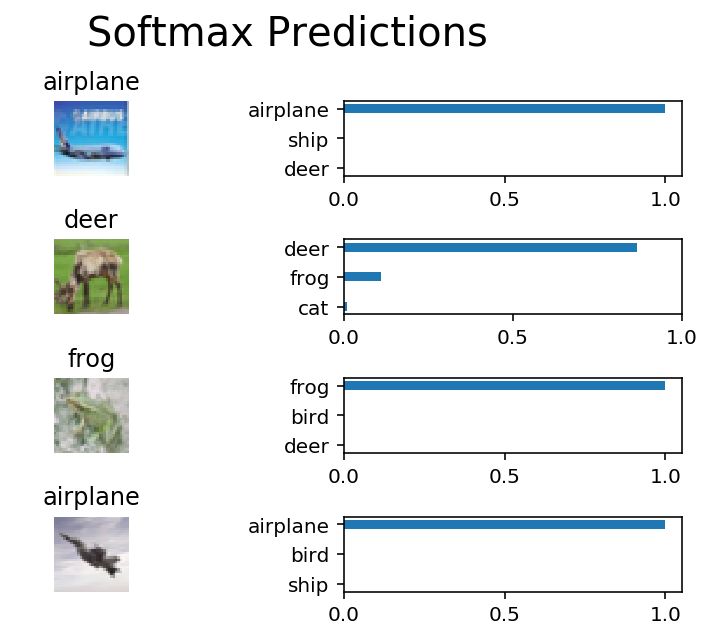

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.